In [1]:
!pip install librosa

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

import os

## File 1 - Male, Angry

In [3]:
directory_path = "/kaggle/input/cremad/AudioWAV/"
audio_file_name = "1001_DFA_ANG_XX.wav"
audio_path = os.path.join(directory_path, audio_file_name)


In [4]:
samples, sampling_rate = librosa.load(audio_path, sr = None, mono = True, offset = 0.0, duration = None, res_type = 'kaiser_best')
len(samples), sampling_rate

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(36409, 16000)

## Emotion

#### Thus, duration of the audio file is : 2.28 s approx. (Duration = number of samples / sampling rate)

In [5]:
from IPython.display import Audio
Audio(audio_path)

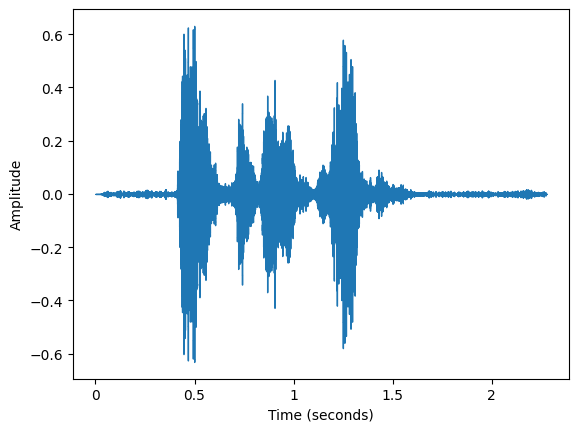

In [6]:
from librosa import display
plt.figure()
librosa.display.waveshow(y = samples, sr = sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [7]:
import numpy as np
from scipy.io import wavfile
_, audio_data = wavfile.read(audio_path)
audio_data = audio_data.astype(np.float32)

In [8]:
pitch = librosa.piptrack(y=audio_data, sr=sampling_rate)[0]
fundamental_frequency_index = np.argmax(pitch)
fundamental_frequency_hz = fundamental_frequency_index * (sampling_rate / len(pitch))
print(f"Estimated Fundamental Frequency: {fundamental_frequency_hz} Hz")

Estimated Fundamental Frequency: 575094.6341463415 Hz


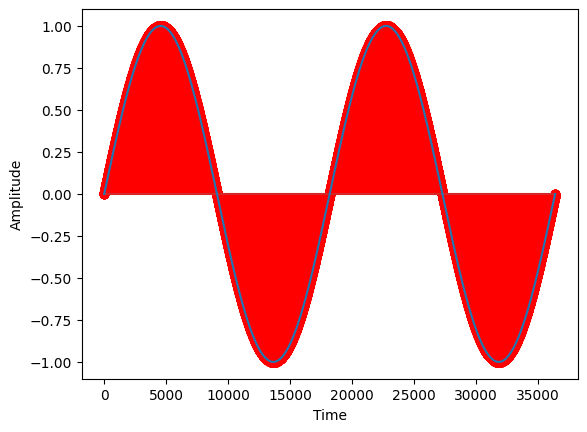

In [9]:
samples= 36409
frequency = 2
x = np.arange(samples)
y1 = np.sin(2*np.pi*frequency * (x/samples))
plt.figure()
plt.stem(x,y1,'r',)
plt.plot(x,y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

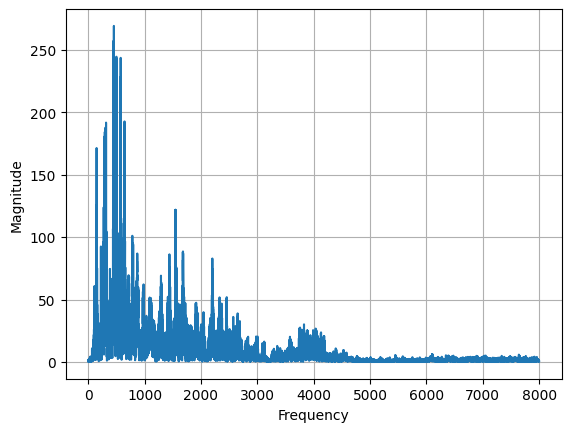

In [10]:
# Frequency graph 
from scipy.fft import fft
import scipy.io.wavfile as wav
import scipy
sampling_rate, audio_data = wav.read(audio_path)

n = len(audio_data)
T = 1/(sampling_rate)
yf = fft(audio_data)
xf = np.linspace(0.0, 1.0/(2.0*T), int(n/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/n * np.abs(yf[:n//2]))
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

In [11]:
y, sr = librosa.load(audio_path)

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

In [12]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

In [13]:
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

Text(0.5, 1.0, 'MFCCs')

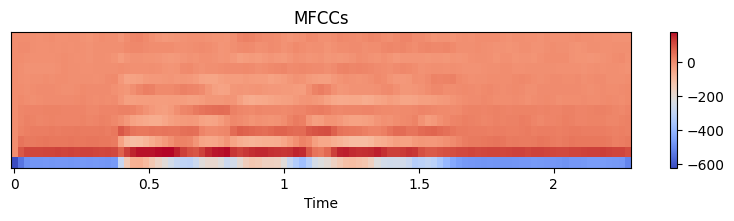

In [14]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')

Text(0.5, 1.0, 'Chroma')

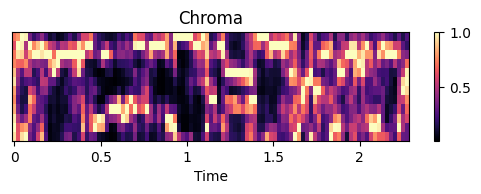

In [15]:
plt.subplot(3, 1, 2)
librosa.display.specshow(chroma, x_axis='time')
plt.colorbar()
plt.title('Chroma')

Text(0.5, 1.0, 'Spectral Contrast')

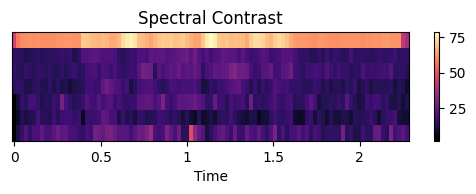

In [16]:
plt.subplot(3, 1, 3)
librosa.display.specshow(spectral_contrast, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')

In [17]:
print("MFCCs shape:", mfccs.shape)
print("Chroma shape:", chroma.shape)

MFCCs shape: (13, 99)
Chroma shape: (12, 99)


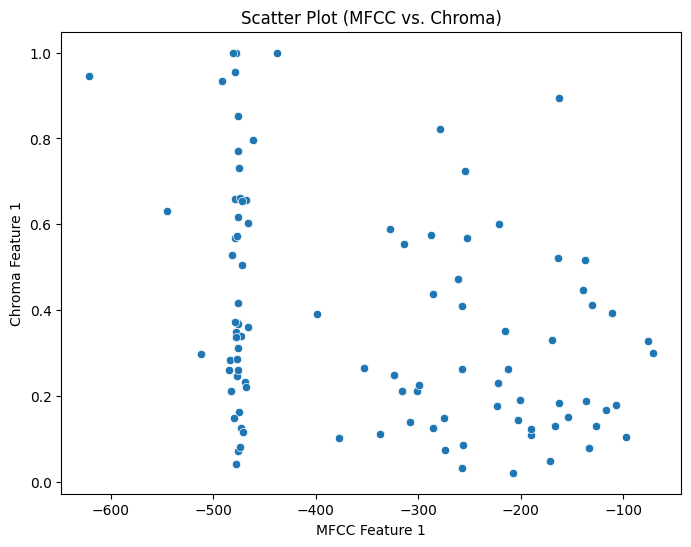

In [18]:
import seaborn as sns
plt.figure(figsize=(8, 6))

sns.scatterplot(x=mfccs[0, :], y=chroma[0, :])
plt.title('Scatter Plot (MFCC vs. Chroma)')
plt.xlabel('MFCC Feature 1')
plt.ylabel('Chroma Feature 1')

plt.show()


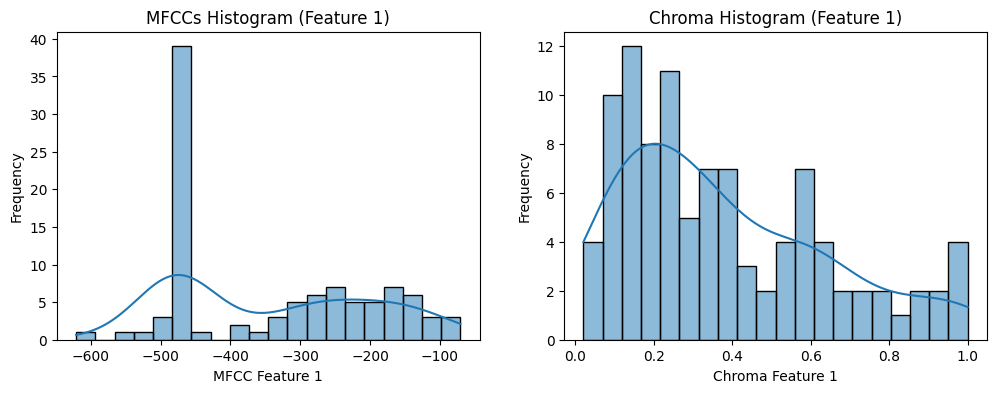

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Mfcc histogram
sns.histplot(mfccs[0, :], bins=20, kde=True, ax=axes[0])
axes[0].set_title('MFCCs Histogram (Feature 1)')
axes[0].set_xlabel('MFCC Feature 1')
axes[0].set_ylabel('Frequency')
# Chrome histogram
sns.histplot(chroma[0, :], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Chroma Histogram (Feature 1)')
axes[1].set_xlabel('Chroma Feature 1')
axes[1].set_ylabel('Frequency')
plt.show()


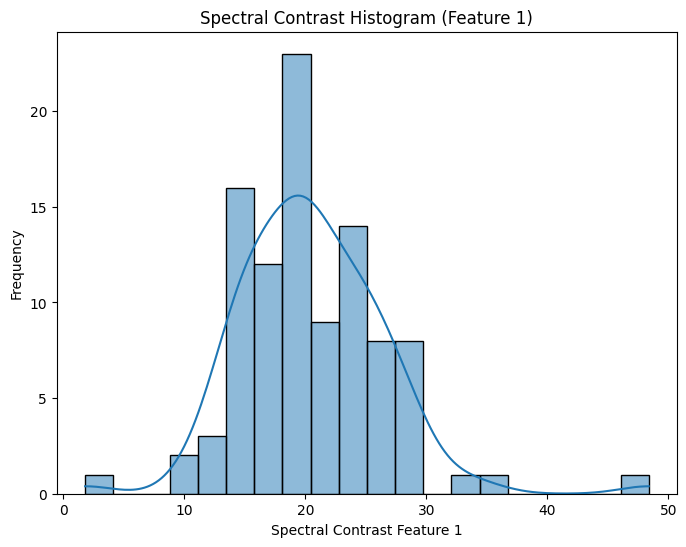

In [20]:
plt.figure(figsize=(8, 6))
feature_index = 0
sns.histplot(spectral_contrast[feature_index, :], bins=20, kde=True)
plt.title(f'Spectral Contrast Histogram (Feature {feature_index + 1})')
plt.xlabel(f'Spectral Contrast Feature {feature_index + 1}')
plt.ylabel('Frequency')
plt.show()

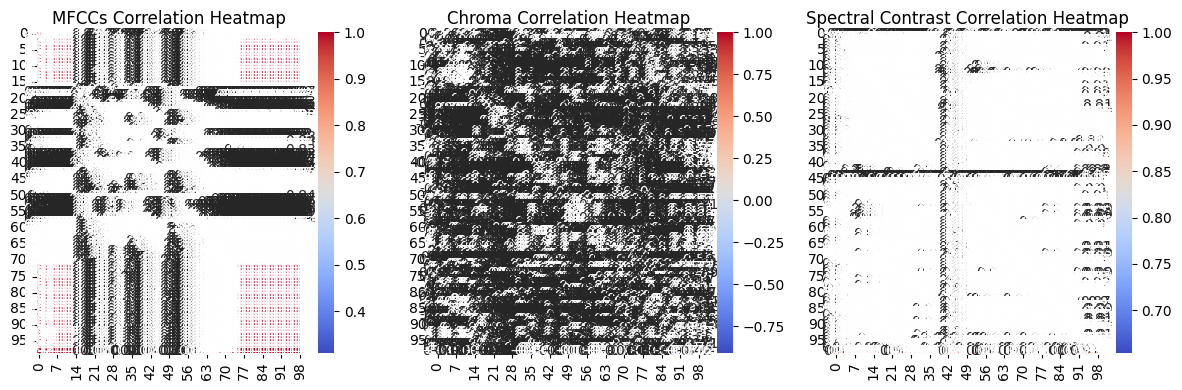

In [21]:
correlation_mfccs = np.corrcoef(mfccs, rowvar=False)
correlation_chroma = np.corrcoef(chroma, rowvar=False)
correlation_spectral_contrast = np.corrcoef(spectral_contrast, rowvar=False)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(correlation_mfccs, annot=True, cmap='coolwarm')
plt.title('MFCCs Correlation Heatmap')

plt.subplot(1, 3, 2)
sns.heatmap(correlation_chroma, annot=True, cmap='coolwarm')
plt.title('Chroma Correlation Heatmap')

plt.subplot(1, 3, 3)
sns.heatmap(correlation_spectral_contrast, annot=True, cmap='coolwarm')
plt.title('Spectral Contrast Correlation Heatmap')

plt.tight_layout()
plt.show()

## Gender

In [22]:
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 49.4 MB/s eta 0:00:0000:010:01


In [23]:
import parselmouth
def extract_audio_features(audio_path):
    snd = parselmouth.Sound(audio_path)
    pitch = snd.to_pitch()
    formants = snd.to_formant_burg()
    intensity = snd.to_intensity()

    f0_values = pitch.selected_array['frequency']
    
    formant_times = [t * 0.001 for t in range(len(f0_values))]
    formant_values = np.array([formants.get_value_at_time(1, t) for t in formant_times])
    energy_values = intensity.values

    return f0_values, formant_values, energy_values

In [24]:
all_f0_values = []
all_formant_values = []
all_energy_values = []

In [25]:
for audio_file_name in os.listdir(directory_path):
    if audio_file_name.endswith(".wav"):
        f0, formants, energy = extract_audio_features(audio_path)

        all_f0_values.append(f0)
        all_formant_values.append(formants)
        all_energy_values.append(energy)

In [26]:
f0_values = np.array(all_f0_values)
formant_values = np.array(all_formant_values)
energy_values = np.array(all_energy_values)

In [27]:
energy_values

array([[[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       ...,

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]],

       [[37.92810521, 43.2223207 , 46.20957393, ..., 44.23448151,
         44.22576528, 43.16655805]]])

## Age

In [28]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 38.4 MB/s eta 0:00:0000:0100:01


In [29]:
!pip install pydub aubio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.0/479.0 kB 9.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for aubio: filename=aubio-0.4.9-cp310-cp310-linux_x86_64.whl size=149545 sha256=dd278f252e5bafc2d8e6775f694c891d74179495fedb8b16932939d55cc96679
  Stored in directory: /root/.cache/pip/wheels/00/30/30/a06fe7e9c7fe740486c219851b2bc1c7ed4a97e9c257efd3d7
Successfully built aubio


In [30]:
# age
# def extract_age_features(audio_file):
#     snd = parselmouth.Sound(audio_file)
#     intensity = snd.to_intensity()
#     duration = snd.get_total_duration()
    
#     return duration
# durations = []

In [31]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import speech_recognition as sr
import aubio



/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [32]:
sia = SentimentIntensityAnalyzer()
def extract_speech_content(audio_path):
    audio, sr = librosa.load(audio_path, sr=None)

    transcript = transcribe_audio(audio_path)

    sentiment_scores = sia.polarity_scores(transcript)
    return transcript, sentiment_scores

In [33]:

def extract_pitch(audio_path):
    pitch_obj = aubio.pitch("yin")
    audio_source = aubio.source(audio_path)

    pitch_values = []
    while True:
        samples, read = audio_source()
        if read:
            pitch = pitch_obj(samples)[0]
            pitch_values.append(pitch)
        else:
            break

    return pitch_values

In [34]:
def transcribe_audio(audio_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_path) as source:
        audio = recognizer.record(source)
        try:
            transcript = recognizer.recognize_google(audio)
        except sr.UnknownValueError:
            transcript = ""
    return transcript


In [35]:
all_transcripts = []
all_sentiment_scores = []
all_pitch_values = []
all_speaking_rates = []

In [36]:
for audio_file_name in os.listdir(directory_path):
    if audio_file_name.endswith(".wav"):
        transcript, sentiment_scores = extract_speech_content(audio_path)
        pitch_values = extract_pitch(audio_path)
        speaking_rate = np.count_nonzero(pitch_values) / len(pitch_values)

        all_transcripts.append(transcript)
        all_sentiment_scores.append(sentiment_scores)
        all_pitch_values.append(pitch_values)
        all_speaking_rates.append(speaking_rate)

        

In [37]:
        
all_transcripts = np.array(all_transcripts)
all_sentiment_scores = np.array(all_sentiment_scores)
all_pitch_values = np.array(all_pitch_values)
all_speaking_rates = np.array(all_speaking_rates)


In [38]:
all_sentiment_scores

array([{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695}, ...,
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695},
       {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'compound': 0.1695}],
      dtype=object)

In [39]:

# plt.figure(figsize=(12, 6))
# plt.subplot(2, 2, 1)
# sns.histplot(all_sentiment_scores, bins=20, kde=True)
# plt.title("Sentiment Score Histogram")
# plt.xlabel("Sentiment Score")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 2)
# sns.histplot(all_pitch_values, bins=20, kde=True)
# plt.title("Pitch Value Histogram")
# plt.xlabel("Pitch Value (MIDI)")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 3)
# sns.histplot(all_speaking_rates, bins=20, kde=True)
# plt.title("Speaking Rate Histogram")
# plt.xlabel("Speaking Rate (Frames per Word)")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 4)
# sns.boxplot(data=all_sentiment_scores)
# plt.title("Sentiment Score Box Plot")
# plt.xlabel("Sentiment Score")

# plt.tight_layout()
# plt.show()


In [40]:
import pandas as pd
import numpy as np

arrays = [mfccs, chroma, spectral_contrast, f0_values, formant_values, all_pitch_values, energy_values, all_transcripts, all_sentiment_scores, all_speaking_rates]

max_length = max(len(arr) for arr in arrays)

def flatten(arr):
#     padded = np.pad(arr, (0, length - len(arr)), mode='constant')
    return arr.flatten()



mfccs_flat = flatten(mfccs)
chroma_flat = flatten(chroma)
spectral_contrast_flat = flatten(spectral_contrast)
f0_values_flat = flatten(f0_values)
formant_flat = flatten(formant_values)
all_pitch_values_flat = flatten(all_pitch_values)
energy_flat = flatten(energy_values)
transcript_flat = flatten(all_transcripts)
sentiment_flat = flatten(all_sentiment_scores)
speaking_flat = flatten(all_speaking_rates)

mfccs_flat_pad = max_length - len(mfccs_flat)
chroma_flat_pad = max_length - len(chroma_flat)
spectral_flat_pad = max_length - len(spectral_contrast_flat)
# f0_flat_pad = max_length - len(f0_values_flat)
# formant_flat_pad = max_length - len(formant_flat)
# pitch_flat_pad = max_length - len(all_pitch_values_flat)
# energy_flat_pad = max_length - len(energy_flat)
# transcript_flat_pad = max_length - len(transcript_flat)
# sentiment_flat_pad = max_length - len(sentiment_flat)
# speaking_flat_pad = max_length - len(speaking_flat)

data = {
    'MFCC': np.pad(mfccs_flat,(0, mfccs_flat_pad), mode = 'constant'),
    'Chroma': np.pad(chroma_flat,(0, chroma_flat_pad), mode = 'constant'),
    'SpectralContrast': np.pad(spectral_contrast_flat,(0, spectral_flat_pad), mode = 'constant'),
 
}

df = pd.DataFrame(data)

print(df.head())

         MFCC    Chroma  SpectralContrast
0 -620.808838  0.945109          1.799842
1 -545.379822  0.630143         10.970542
2 -491.683746  0.934065         16.203738
3 -478.101440  1.000000         21.204754
4 -478.082214  0.348262         15.844358


In [41]:
max_length = max(len(arr) for arr in [f0_values_flat, formant_flat, all_pitch_values_flat, energy_flat, transcript_flat, sentiment_flat, speaking_flat])
def pad_and_fill(arr, length, fill_value=np.nan):
    if len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), mode='constant', constant_values=fill_value)
    return arr

f0_values_padded = pad_and_fill(f0_values_flat, max_length)
formant_padded = pad_and_fill(formant_flat, max_length)
all_pitch_values_padded = pad_and_fill(all_pitch_values_flat, max_length)
energy_padded = pad_and_fill(energy_flat, max_length)
transcript_padded = pad_and_fill(transcript_flat, max_length)
sentiment_padded = pad_and_fill(sentiment_flat, max_length)
speaking_padded = pad_and_fill(speaking_flat, max_length)


data_1 = {
    'F0': f0_values_padded,
    'Formant': formant_padded,
    'Pitch': all_pitch_values_padded,
    'Energy': energy_padded,
    'Transcript': transcript_padded,
    'Sentiment Scores': sentiment_padded,
    'Speaking Rate': speaking_padded
}

df_1 = pd.DataFrame(data_1)

print(df_1.head())

    F0  Formant        Pitch     Energy             Transcript  \
0  0.0      NaN     0.000000  37.928105  don't forget a jacket   
1  0.0      NaN  4986.637695  43.222321  don't forget a jacket   
2  0.0      NaN     0.000000  46.209574  don't forget a jacket   
3  0.0      NaN   293.304840  47.436570  don't forget a jacket   
4  0.0      NaN   153.031265  46.603790  don't forget a jacket   

                                    Sentiment Scores  Speaking Rate  
0  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
1  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
2  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
3  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  
4  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.902778  


In [42]:
result = pd.concat([df, df_1], axis=1)


In [43]:
result.info

<bound method DataFrame.info of                MFCC    Chroma  SpectralContrast   F0  Formant        Pitch  \
0       -620.808838  0.945109          1.799842  0.0      NaN     0.000000   
1       -545.379822  0.630143         10.970542  0.0      NaN  4986.637695   
2       -491.683746  0.934065         16.203738  0.0      NaN     0.000000   
3       -478.101440  1.000000         21.204754  0.0      NaN   293.304840   
4       -478.082214  0.348262         15.844358  0.0      NaN   153.031265   
...             ...       ...               ...  ...      ...          ...   
2061429         NaN       NaN               NaN  NaN      NaN          NaN   
2061430         NaN       NaN               NaN  NaN      NaN          NaN   
2061431         NaN       NaN               NaN  NaN      NaN          NaN   
2061432         NaN       NaN               NaN  NaN      NaN          NaN   
2061433         NaN       NaN               NaN  NaN      NaN          NaN   

            Energy             

## File 2 - Male, SAD

In [44]:
audio_file_name1 = "1001_DFA_SAD_XX.wav"
audio_path1 = os.path.join(directory_path, audio_file_name1)
samples_1, sampling_rate_1 = librosa.load(audio_path, sr = None, mono = True, offset = 0.0, duration = None, res_type = 'kaiser_best')
len(samples_1), sampling_rate_1

(36409, 16000)

In [45]:
from IPython.display import Audio
Audio(audio_path1)

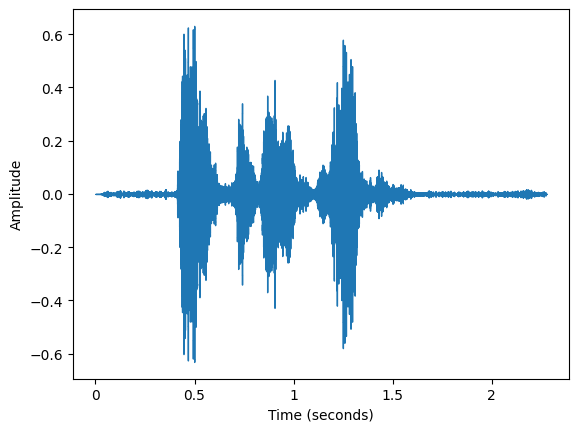

In [46]:
from librosa import display
plt.figure()
librosa.display.waveshow(y = samples_1, sr = sampling_rate_1)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [47]:
import numpy as np
from scipy.io import wavfile
_, audio_data1 = wavfile.read(audio_path1)
audio_data1 = audio_data.astype(np.float32)

In [48]:
y1, sr1 = librosa.load(audio_path1)

mfccs_1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)
chroma_1 = librosa.feature.chroma_stft(y=y1, sr=sr1)
spectral_contrast1 = librosa.feature.spectral_contrast(y=y1, sr=sr1)

## Gender

In [49]:
all_f0_values_1 = []
all_formant_values_1 = []
all_energy_values_1 = []

for audio_file_name1 in os.listdir(directory_path):
    if audio_file_name1.endswith(".wav"):
        f0_1, formants1, energy1 = extract_audio_features(audio_path1)

        all_f0_values_1.append(f0_1)
        all_formant_values_1.append(formants1)
        all_energy_values_1.append(energy1)
        
f0_values_1 = np.array(all_f0_values_1)
formant_values_1 = np.array(all_formant_values_1)
energy_values_1 = np.array(all_energy_values_1)

## Age

In [50]:
sia1 = SentimentIntensityAnalyzer()


In [51]:
all_transcripts_1 = []
all_sentiment_scores_1 = []
all_pitch_values_1 = []
all_speaking_rates_1 = []

In [90]:
for audio_file_name1 in os.listdir(directory_path):
    if audio_file_name1.endswith(".wav"):
        transcript_1, sentiment_scores_1 = extract_speech_content(audio_path1)
        pitch_values_1 = extract_pitch(audio_path1)
        speaking_rate_1 = np.count_nonzero(pitch_values_1) / len(pitch_values_1)

        all_transcripts_1.append(transcript_1)
        all_sentiment_scores_1.append(sentiment_scores_1)
        all_pitch_values_1.append(pitch_values_1)
        all_speaking_rates_1.append(speaking_rate_1)
        
all_transcripts_1 = np.array(all_transcripts_1)
all_sentiment_scores_1 = np.array(all_sentiment_scores_1)
all_pitch_values_1 = np.array(all_pitch_values_1)
all_speaking_rates_1 = np.array(all_speaking_rates_1)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [76]:
arrays_1 = [mfccs_1, chroma_1, spectral_contrast1, f0_values_1, formant_values_1, all_pitch_values_1, energy_values_1, all_transcripts_1, all_sentiment_scores_1, all_speaking_rates_1]

max_length_1 = max(len(arr) for arr in arrays_1)

mfccs_flat_1 = flatten(mfccs_1)
chroma_flat_1 = flatten(chroma_1)
spectral_contrast_flat_1 = flatten(spectral_contrast1)
f0_values_flat_1 = flatten(f0_values_1)
formant_flat_1 = flatten(formant_values_1)
all_pitch_values_flat_1 = flatten(all_pitch_values_1)
energy_flat_1 = flatten(energy_values_1)
transcript_flat_1 = flatten(all_transcripts_1)
sentiment_flat_1 = flatten(all_sentiment_scores_1)
speaking_flat_1 = flatten(all_speaking_rates_1)

mfccs_flat_pad_1 = max_length_1 - len(mfccs_flat_1)
chroma_flat_pad_1 = max_length_1 - len(chroma_flat_1)
spectral_flat_pad_1 = max_length_1 - len(spectral_contrast_flat_1)

data_2 = {
    'MFCC': np.pad(mfccs_flat_1,(0, mfccs_flat_pad_1), mode = 'constant'),
    'Chroma': np.pad(chroma_flat_1,(0, chroma_flat_pad_1), mode = 'constant'),
    'SpectralContrast': np.pad(spectral_contrast_flat_1,(0, spectral_flat_pad_1), mode = 'constant'),
 
}

df_2 = pd.DataFrame(data_2)

print(df_2.head())

         MFCC    Chroma  SpectralContrast
0 -523.167480  0.393012         25.638554
1 -494.077118  0.206640         15.026407
2 -488.657288  0.093489         14.778195
3 -487.736572  0.093559         16.999425
4 -488.344910  0.145120         17.417290


In [77]:
max_length_2 = max(len(arr) for arr in [f0_values_flat_1, formant_flat_1, all_pitch_values_flat_1, energy_flat_1, transcript_flat_1, sentiment_flat_1, speaking_flat_1])
def pad_and_fill(arr, length, fill_value=np.nan):
    if len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), mode='constant', constant_values=fill_value)
    return arr

f0_values_padded_1 = pad_and_fill(f0_values_flat_1, max_length_2)
formant_padded_1 = pad_and_fill(formant_flat_1, max_length_2)
all_pitch_values_padded_1 = pad_and_fill(all_pitch_values_flat_1, max_length_2)
energy_padded_1 = pad_and_fill(energy_flat_1, max_length_2)
transcript_padded_1 = pad_and_fill(transcript_flat_1, max_length_2)
sentiment_padded_1 = pad_and_fill(sentiment_flat_1, max_length_2)
speaking_padded_1 = pad_and_fill(speaking_flat_1, max_length_2)


data_3 = {
    'F0': f0_values_padded_1,
    'Formant': formant_padded_1,
    'Pitch': all_pitch_values_padded_1,
    'Energy': energy_padded_1,
    'Transcript': transcript_padded_1,
    'Sentiment Scores': sentiment_padded_1,
    'Speaking Rate': speaking_padded_1
}

df_3 = pd.DataFrame(data_3)

print(df_3.head())

           F0  Formant         Pitch     Energy             Transcript  \
0    0.000000      NaN  88200.000000  46.969735  don't forget a jacket   
1    0.000000      NaN    103.956810  48.894100  don't forget a jacket   
2    0.000000      NaN     88.140968  49.535356  don't forget a jacket   
3    0.000000      NaN    602.566528  49.653914  don't forget a jacket   
4  224.183062      NaN    305.311249  50.077280  don't forget a jacket   

                                    Sentiment Scores  Speaking Rate  
0  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.968254  
1  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.968254  
2  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.968254  
3  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.968254  
4  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.968254  


In [78]:
result_1 = pd.concat([df_2, df_3], axis=1)

In [79]:
result_1.head()

,MFCC,Chroma,SpectralContrast,F0,Formant,Pitch,Energy,Transcript,Sentiment Scores,Speaking Rate
0,-523.167480,0.393012,25.638554,0.000000,NaN,88200.000000,46.969735,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.968254
1,-494.077118,0.206640,15.026407,0.000000,NaN,103.956810,48.894100,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.968254
2,-488.657288,0.093489,14.778195,0.000000,NaN,88.140968,49.535356,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.968254
3,-487.736572,0.093559,16.999425,0.000000,NaN,602.566528,49.653914,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.968254
4,-488.344910,0.145120,17.417290,224.183062,NaN,305.311249,50.077280,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.968254


In [57]:
# result = result.append(result_1, ignore_index = True)

In [58]:
# result = pd.DataFrame(result)

In [80]:
result = pd.concat([result,result_1],ignore_index= True)

In [81]:
result.info

<bound method DataFrame.info of                MFCC    Chroma  SpectralContrast   F0  Formant        Pitch  \
0       -620.808838  0.945109          1.799842  0.0      NaN     0.000000   
1       -545.379822  0.630143         10.970542  0.0      NaN  4986.637695   
2       -491.683746  0.934065         16.203738  0.0      NaN     0.000000   
3       -478.101440  1.000000         21.204754  0.0      NaN   293.304840   
4       -478.082214  0.348262         15.844358  0.0      NaN   153.031265   
...             ...       ...               ...  ...      ...          ...   
7948051         NaN       NaN               NaN  NaN      NaN          NaN   
7948052         NaN       NaN               NaN  NaN      NaN          NaN   
7948053         NaN       NaN               NaN  NaN      NaN          NaN   
7948054         NaN       NaN               NaN  NaN      NaN          NaN   
7948055         NaN       NaN               NaN  NaN      NaN          NaN   

            Energy             

### File 3 - Female, Neutral

In [82]:
audio_file_name2 = "1002_DFA_NEU_XX.wav"
audio_path2 = os.path.join(directory_path, audio_file_name2)
samples_2, sampling_rate_2 = librosa.load(audio_path, sr = None, mono = True, offset = 0.0, duration = None, res_type = 'kaiser_best')
len(samples_2), sampling_rate_2

(36409, 16000)

In [83]:
from IPython.display import Audio
Audio(audio_path2)

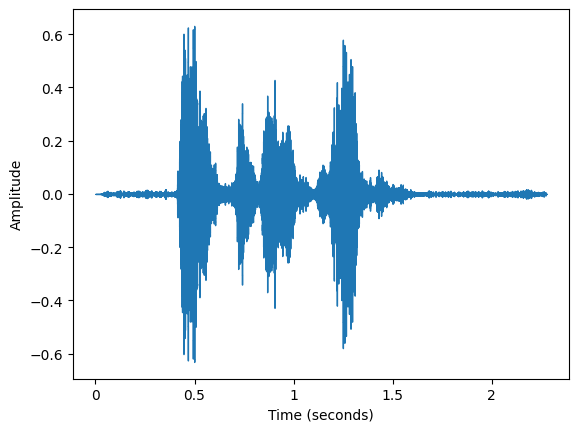

In [84]:
from librosa import display
plt.figure()
librosa.display.waveshow(y = samples_2, sr = sampling_rate_2)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

In [85]:
y2, sr2 = librosa.load(audio_path2)

mfccs_2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)
chroma_2 = librosa.feature.chroma_stft(y=y2, sr=sr2)
spectral_contrast2 = librosa.feature.spectral_contrast(y=y2, sr=sr2)

In [86]:
all_f0_values_2 = []
all_formant_values_2 = []
all_energy_values_2 = []

for audio_file_name2 in os.listdir(directory_path):
    if audio_file_name2.endswith(".wav"):
        f0_2, formants2, energy2 = extract_audio_features(audio_path2)

        all_f0_values_2.append(f0_2)
        all_formant_values_2.append(formants2)
        all_energy_values_2.append(energy2)
        
f0_values_2 = np.array(all_f0_values_2)
formant_values_2 = np.array(all_formant_values_2)
energy_values_2 = np.array(all_energy_values_2)

In [87]:
sia2 = SentimentIntensityAnalyzer()

all_transcripts_2 = []
all_sentiment_scores_2 = []
all_pitch_values_2 = []
all_speaking_rates_2 = []

for audio_file_name2 in os.listdir(directory_path):
    if audio_file_name2.endswith(".wav"):
        transcript_2, sentiment_scores_2 = extract_speech_content(audio_path2)
        pitch_values_2 = extract_pitch(audio_path2)
        speaking_rate_2 = np.count_nonzero(pitch_values_2) / len(pitch_values_2)

        all_transcripts_2.append(transcript_2)
        all_sentiment_scores_2.append(sentiment_scores_2)
        all_pitch_values_2.append(pitch_values_2)
        all_speaking_rates_2.append(speaking_rate_2)
        
all_transcripts_2 = np.array(all_transcripts_2)
all_sentiment_scores_2 = np.array(all_sentiment_scores_2)
all_pitch_values_2 = np.array(all_pitch_values_2)
all_speaking_rates_2 = np.array(all_speaking_rates_2)


In [88]:
arrays_2 = [mfccs_2, chroma_2, spectral_contrast2, f0_values_2, formant_values_2, all_pitch_values_2, energy_values_2, all_transcripts_2, all_sentiment_scores_2, all_speaking_rates_2]

max_length_3 = max(len(arr) for arr in arrays_2)

mfccs_flat_2 = flatten(mfccs_2)
chroma_flat_2 = flatten(chroma_2)
spectral_contrast_flat_2 = flatten(spectral_contrast2)
f0_values_flat_2 = flatten(f0_values_2)
formant_flat_2 = flatten(formant_values_2)
all_pitch_values_flat_2 = flatten(all_pitch_values_2)
energy_flat_2 = flatten(energy_values_2)
transcript_flat_2 = flatten(all_transcripts_2)
sentiment_flat_2 = flatten(all_sentiment_scores_2)
speaking_flat_2 = flatten(all_speaking_rates_2)

mfccs_flat_pad_2 = max_length_3 - len(mfccs_flat_2)
chroma_flat_pad_2 = max_length_3 - len(chroma_flat_2)
spectral_flat_pad_2 = max_length_3 - len(spectral_contrast_flat_2)

data_4 = {
    'MFCC': np.pad(mfccs_flat_2,(0, mfccs_flat_pad_2), mode = 'constant'),
    'Chroma': np.pad(chroma_flat_2,(0, chroma_flat_pad_2), mode = 'constant'),
    'SpectralContrast': np.pad(spectral_contrast_flat_2,(0, spectral_flat_pad_2), mode = 'constant'),
 
}

df_4 = pd.DataFrame(data_4)

print(df_4.head())

         MFCC    Chroma  SpectralContrast
0 -489.263458  0.636278         16.283511
1 -478.858856  0.768380         18.538602
2 -487.707825  0.423921         17.289607
3 -491.051910  0.150663         15.674564
4 -488.596741  0.216781         16.817881


In [89]:
max_length_4 = max(len(arr) for arr in [f0_values_flat_2, formant_flat_2, all_pitch_values_flat_2, energy_flat_2, transcript_flat_2, sentiment_flat_2, speaking_flat_2])
def pad_and_fill(arr, length, fill_value=np.nan):
    if len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), mode='constant', constant_values=fill_value)
    return arr

f0_values_padded_2 = pad_and_fill(f0_values_flat_2, max_length_4)
formant_padded_2 = pad_and_fill(formant_flat_2, max_length_4)
all_pitch_values_padded_2 = pad_and_fill(all_pitch_values_flat_2, max_length_4)
energy_padded_2 = pad_and_fill(energy_flat_2, max_length_4)
transcript_padded_2 = pad_and_fill(transcript_flat_2, max_length_4)
sentiment_padded_2 = pad_and_fill(sentiment_flat_2, max_length_4)
speaking_padded_2 = pad_and_fill(speaking_flat_2, max_length_4)


data_5 = {
    'F0': f0_values_padded_2,
    'Formant': formant_padded_2,
    'Pitch': all_pitch_values_padded_2,
    'Energy': energy_padded_2,
    'Transcript': transcript_padded_2,
    'Sentiment Scores': sentiment_padded_2,
    'Speaking Rate': speaking_padded_2
}

df_5 = pd.DataFrame(data_5)

print(df_5.head())

    F0  Formant         Pitch     Energy             Transcript  \
0  0.0      NaN  88200.000000  45.238677  don't forget a jacket   
1  0.0      NaN      0.000000  43.147918  don't forget a jacket   
2  0.0      NaN    104.750336  43.923392  don't forget a jacket   
3  0.0      NaN    106.616318  43.641866  don't forget a jacket   
4  0.0      NaN    101.714035  43.614255  don't forget a jacket   

                                    Sentiment Scores  Speaking Rate  
0  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.936709  
1  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.936709  
2  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.936709  
3  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.936709  
4  {'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...       0.936709  


In [91]:
result_2 = pd.concat([df_4, df_5], axis=1)

In [92]:
result = pd.concat([result,result_2],ignore_index= True)

In [93]:
result.head()

,MFCC,Chroma,SpectralContrast,F0,Formant,Pitch,Energy,Transcript,Sentiment Scores,Speaking Rate
0,-620.808838,0.945109,1.799842,0.0,NaN,0.000000,37.928105,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
1,-545.379822,0.630143,10.970542,0.0,NaN,4986.637695,43.222321,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
2,-491.683746,0.934065,16.203738,0.0,NaN,0.000000,46.209574,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
3,-478.101440,1.000000,21.204754,0.0,NaN,293.304840,47.436570,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
4,-478.082214,0.348262,15.844358,0.0,NaN,153.031265,46.603790,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778


## File - 4; Female, Happy

In [94]:
##1003_IWL_HAP_XX.wav
audio_file_name3 = "1003_IWL_HAP_XX.wav"
audio_path3 = os.path.join(directory_path, audio_file_name3)
samples_3, sampling_rate_3 = librosa.load(audio_path, sr = None, mono = True, offset = 0.0, duration = None, res_type = 'kaiser_best')
len(samples_3), sampling_rate_3

(36409, 16000)

In [95]:
y3, sr3 = librosa.load(audio_path3)

mfccs_3 = librosa.feature.mfcc(y=y3, sr=sr3, n_mfcc=13)
chroma_3 = librosa.feature.chroma_stft(y=y3, sr=sr3)
spectral_contrast3 = librosa.feature.spectral_contrast(y=y3, sr=sr3)

In [96]:
all_f0_values_3 = []
all_formant_values_3 = []
all_energy_values_3 = []

for audio_file_name3 in os.listdir(directory_path):
    if audio_file_name3.endswith(".wav"):
        f0_3, formants3, energy3 = extract_audio_features(audio_path3)

        all_f0_values_3.append(f0_3)
        all_formant_values_3.append(formants3)
        all_energy_values_3.append(energy3)
        
f0_values_3 = np.array(all_f0_values_3)
formant_values_3 = np.array(all_formant_values_3)
energy_values_3 = np.array(all_energy_values_3)

In [98]:
sia3 = SentimentIntensityAnalyzer()

all_transcripts_3 = []
all_sentiment_scores_3 = []
all_pitch_values_3 = []
all_speaking_rates_3 = []

for audio_file_name3 in os.listdir(directory_path):
    if audio_file_name3.endswith(".wav"):
        transcript_3, sentiment_scores_3 = extract_speech_content(audio_path3)
        pitch_values_3 = extract_pitch(audio_path3)
        speaking_rate_3 = np.count_nonzero(pitch_values_3) / len(pitch_values_3)

        all_transcripts_3.append(transcript_3)
        all_sentiment_scores_3.append(sentiment_scores_3)
        all_pitch_values_3.append(pitch_values_3)
        all_speaking_rates_3.append(speaking_rate_3)
        
all_transcripts_3 = np.array(all_transcripts_3)
all_sentiment_scores_3 = np.array(all_sentiment_scores_3)
all_pitch_values_3 = np.array(all_pitch_values_3)
all_speaking_rates_3 = np.array(all_speaking_rates_3)

In [99]:
arrays_3 = [mfccs_3, chroma_3, spectral_contrast3, f0_values_3, formant_values_3, all_pitch_values_3, energy_values_3, all_transcripts_3, all_sentiment_scores_3, all_speaking_rates_3]

max_length_5 = max(len(arr) for arr in arrays_3)

mfccs_flat_3 = flatten(mfccs_3)
chroma_flat_3 = flatten(chroma_3)
spectral_contrast_flat_3 = flatten(spectral_contrast3)
f0_values_flat_3 = flatten(f0_values_3)
formant_flat_3 = flatten(formant_values_3)
all_pitch_values_flat_3 = flatten(all_pitch_values_3)
energy_flat_3 = flatten(energy_values_3)
transcript_flat_3 = flatten(all_transcripts_3)
sentiment_flat_3 = flatten(all_sentiment_scores_3)
speaking_flat_3 = flatten(all_speaking_rates_3)

mfccs_flat_pad_3 = max_length_5 - len(mfccs_flat_3)
chroma_flat_pad_3 = max_length_5 - len(chroma_flat_3)
spectral_flat_pad_3 = max_length_5 - len(spectral_contrast_flat_3)

data_6 = {
    'MFCC': np.pad(mfccs_flat_3,(0, mfccs_flat_pad_3), mode = 'constant'),
    'Chroma': np.pad(chroma_flat_3,(0, chroma_flat_pad_3), mode = 'constant'),
    'SpectralContrast': np.pad(spectral_contrast_flat_3,(0, spectral_flat_pad_3), mode = 'constant'),
 
}

df_6 = pd.DataFrame(data_6)

print(df_6.head())

         MFCC    Chroma  SpectralContrast
0 -511.645782  1.000000         12.892323
1 -479.287476  1.000000         15.974850
2 -477.828552  0.354894         24.123349
3 -478.147583  0.325606         20.168177
4 -484.717926  0.602421         13.605245


In [100]:
max_length_6 = max(len(arr) for arr in [f0_values_flat_3, formant_flat_3, all_pitch_values_flat_3, energy_flat_3, transcript_flat_3, sentiment_flat_3, speaking_flat_3])
def pad_and_fill(arr, length, fill_value=np.nan):
    if len(arr) < length:
        return np.pad(arr, (0, length - len(arr)), mode='constant', constant_values=fill_value)
    return arr

f0_values_padded_3 = pad_and_fill(f0_values_flat_3, max_length_6)
formant_padded_3 = pad_and_fill(formant_flat_3, max_length_6)
all_pitch_values_padded_3 = pad_and_fill(all_pitch_values_flat_3, max_length_6)
energy_padded_3 = pad_and_fill(energy_flat_3, max_length_6)
transcript_padded_3 = pad_and_fill(transcript_flat_3, max_length_6)
sentiment_padded_3 = pad_and_fill(sentiment_flat_3, max_length_6)
speaking_padded_3 = pad_and_fill(speaking_flat_3, max_length_6)


data_7 = {
    'F0': f0_values_padded_3,
    'Formant': formant_padded_3,
    'Pitch': all_pitch_values_padded_3,
    'Energy': energy_padded_3,
    'Transcript': transcript_padded_3,
    'Sentiment Scores': sentiment_padded_3,
    'Speaking Rate': speaking_padded_3
}

df_7 = pd.DataFrame(data_7)

print(df_7.head())

    F0  Formant         Pitch     Energy                      Transcript  \
0  0.0      NaN  88200.000000  45.693117  I would like a new alarm clock   
1  0.0      NaN    357.379822  45.183724  I would like a new alarm clock   
2  0.0      NaN    120.540077  46.454109  I would like a new alarm clock   
3  0.0      NaN    335.305084  47.953938  I would like a new alarm clock   
4  0.0      NaN    262.997650  48.304483  I would like a new alarm clock   

                                    Sentiment Scores  Speaking Rate  
0  {'neg': 0.304, 'neu': 0.38, 'pos': 0.316, 'com...        0.95082  
1  {'neg': 0.304, 'neu': 0.38, 'pos': 0.316, 'com...        0.95082  
2  {'neg': 0.304, 'neu': 0.38, 'pos': 0.316, 'com...        0.95082  
3  {'neg': 0.304, 'neu': 0.38, 'pos': 0.316, 'com...        0.95082  
4  {'neg': 0.304, 'neu': 0.38, 'pos': 0.316, 'com...        0.95082  


In [101]:
result_3 = pd.concat([df_6, df_7], axis=1)

In [102]:
result = pd.concat([result,result_3],ignore_index= True)

In [103]:
result.head()

,MFCC,Chroma,SpectralContrast,F0,Formant,Pitch,Energy,Transcript,Sentiment Scores,Speaking Rate
0,-620.808838,0.945109,1.799842,0.0,NaN,0.000000,37.928105,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
1,-545.379822,0.630143,10.970542,0.0,NaN,4986.637695,43.222321,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
2,-491.683746,0.934065,16.203738,0.0,NaN,0.000000,46.209574,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
3,-478.101440,1.000000,21.204754,0.0,NaN,293.304840,47.436570,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778
4,-478.082214,0.348262,15.844358,0.0,NaN,153.031265,46.603790,don't forget a jacket,"{'neg': 0.0, 'neu': 0.546, 'pos': 0.454, 'comp...",0.902778


In [104]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13790026 entries, 0 to 13790025
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MFCC              float32
 1   Chroma            float32
 2   SpectralContrast  float64
 3   F0                float64
 4   Formant           float64
 5   Pitch             float32
 6   Energy            float64
 7   Transcript        object 
 8   Sentiment Scores  object 
 9   Speaking Rate     float64
dtypes: float32(3), float64(5), object(2)
memory usage: 894.3+ MB


In [105]:
import numpy as np

def preprocess_audio_dataset(dataset):
  max_length = max(len(arr) for arr in dataset)
  padded_dataset = []
  for arr in dataset:
    padded_arr = np.pad(arr, (0, max_length - len(arr)), mode='constant')
    padded_dataset.append(padded_arr)
  preprocessed_dataset = np.array(padded_dataset)

  return preprocessed_dataset
# dataset = [mfccs, chroma, spectral_contrast, f0_values, formant_values, all_pitch_values, energy_values, all_transcripts, all_sentiment_scores, all_speaking_rates]

preprocessed_dataset = preprocess_audio_dataset(result)



In [106]:
result.isnull().sum()

MFCC                13745374
Chroma              13745374
SpectralContrast    13745374
F0                   2634468
Formant              3683790
Pitch               10232750
Energy                     0
Transcript                 0
Sentiment Scores    13745374
Speaking Rate       13745374
dtype: int64

In [113]:
import pandas as pd
import numpy as np

def remove_null_values(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    null_rows_indices = np.where(df.isna().any(axis=1))[0]
    df_cleaned = df.drop(null_rows_indices)

    return df_cleaned
preprocessed_df = remove_null_values(result)
print(preprocessed_df)



Empty DataFrame
Columns: [MFCC, Chroma, SpectralContrast, F0, Formant, Pitch, Energy, Transcript, Sentiment Scores, Speaking Rate]
Index: []


In [115]:
preprocessed_df.isnull().sum()

MFCC                0.0
Chroma              0.0
SpectralContrast    0.0
F0                  0.0
Formant             0.0
Pitch               0.0
Energy              0.0
Transcript          0.0
Sentiment Scores    0.0
Speaking Rate       0.0
dtype: float64

In [116]:
preprocessed_df.head()

,MFCC,Chroma,SpectralContrast,F0,Formant,Pitch,Energy,Transcript,Sentiment Scores,Speaking Rate


In [117]:
result.head()

,MFCC,Chroma,SpectralContrast,F0,Formant,Pitch,Energy,Transcript,Sentiment Scores,Speaking Rate
0,-620.808838,0.945109,1.799842,0.0,NaN,0.000000,37.928105,NaN,NaN,0.902778
1,-545.379822,0.630143,10.970542,0.0,NaN,4986.637695,43.222321,NaN,NaN,0.902778
2,-491.683746,0.934065,16.203738,0.0,NaN,0.000000,46.209574,NaN,NaN,0.902778
3,-478.101440,1.000000,21.204754,0.0,NaN,293.304840,47.436570,NaN,NaN,0.902778
4,-478.082214,0.348262,15.844358,0.0,NaN,153.031265,46.603790,NaN,NaN,0.902778


In [1]:
import pandas as pd
import numpy as np

numeric_cols = result.select_dtypes(include=[np.number])
median_values = numeric_cols.median()
numeric_cols = numeric_cols.fillna(median_values)
result[numeric_cols.columns] = numeric_cols
print(result.head())



NameError: name 'result' is not defined

In [122]:
result = pd.concat([result,result_3],ignore_index= True)